# Project: Investigate a Dataset: TMDB Movie Data

### Student: Mostafa Helmy

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will visualize how certain features like genres affect a movies popularity and its revenues. We will also see if spending more in movies would return higher revenues.

>First we will start by loading our needed libraries and data.

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [1]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the Data for Analysis
df = pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
#Size of the Data
df.shape

(10866, 21)

> Lets start cleaninig the data and see if the null values in the spreadsheet

In [4]:
#Getting Columns with null values
df.columns[df.isna().any()]

Index(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords',
       'overview', 'genres', 'production_companies'],
      dtype='object')

> We can see from the summary of the data above that there are 9 columns with missing values. We can divide them to two groups, the first contains the columns we need in this dataset and cant drop, so we will drop their rows instead, and the second contains the columns that if we drop won't affect the dataset.

> The dropped columns: Production Companies, Tagline, Homepage, Keywords, IMDB ID

In [5]:
#Deleting unneeded columns with null values
df.drop('production_companies', axis=1, inplace=True)
df.drop('tagline', axis=1, inplace=True)
df.drop('homepage', axis=1, inplace=True)
df.drop('keywords', axis=1, inplace=True)
df.drop('imdb_id', axis=1, inplace=True)

> Lets make sure they are dropped

In [6]:
#Checking the remaining columns
df.columns[df.isna().any()]

Index(['cast', 'director', 'overview', 'genres'], dtype='object')

> Now to drop the rest of rows containing null values

In [7]:
#Number of remaining null values
df.shape[0] - df.dropna().shape[0]

136

In [8]:
#Dropping null values
df.dropna(inplace=True)

In [9]:
#Checking that there are no null values
df.isna().sum().sum()

0

> Now to check if there are any irrelevant data types in the dataset.

In [10]:
#Types in the dataframe
df.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
overview           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

> The data of the Cast and Genres are better to be in a form of a list, so it would be easier later to access.

In [11]:
#Converting cast to a list
df['cast'] = df['cast'].apply(lambda row : row.split('|'))
df.head(3)

id  popularity     budget     revenue      original_title  \
0  135397   32.985763  150000000  1513528810      Jurassic World   
1   76341   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201           Insurgent   

                                                cast          director  \
0  [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...   Colin Trevorrow   
1  [Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...     George Miller   
2  [Shailene Woodley, Theo James, Kate Winslet, A...  Robert Schwentke   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   

                                      genres release_date  vote_count  \
0  Action|Adventure|Science Fiction|Thriller       6/9/15        5562   
1  Action|Adventure|Science Fiction|Thriller      5/13/15        6185   
2         Adventure|Science Fiction|Thriller      3/18/15        2480   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08

In [12]:
#converting genres to a list
df['genres'] = df['genres'].apply(lambda row : row.split('|'))
df.head(3)

id  popularity     budget     revenue      original_title  \
0  135397   32.985763  150000000  1513528810      Jurassic World   
1   76341   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201           Insurgent   

                                                cast          director  \
0  [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...   Colin Trevorrow   
1  [Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...     George Miller   
2  [Shailene Woodley, Theo James, Kate Winslet, A...  Robert Schwentke   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   

                                           genres release_date  vote_count  \
0  [Action, Adventure, Science Fiction, Thriller]       6/9/15        5562   
1  [Action, Adventure, Science Fiction, Thriller]      5/13/15        6185   
2          [Adventure, Science Fiction, Thriller]      3/18/15        2480   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08

> The Release Time also need to be changed, it will be better in the form of DateTime for better data analysis.

In [13]:
#converting release date in form of datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df.head(3)

id  popularity     budget     revenue      original_title  \
0  135397   32.985763  150000000  1513528810      Jurassic World   
1   76341   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201           Insurgent   

                                                cast          director  \
0  [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...   Colin Trevorrow   
1  [Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...     George Miller   
2  [Shailene Woodley, Theo James, Kate Winslet, A...  Robert Schwentke   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   

                                           genres release_date  vote_count  \
0  [Action, Adventure, Science Fiction, Thriller]   2015-06-09        5562   
1  [Action, Adventure, Science Fiction, Thriller]   2015-05-13        6185   
2          [Adventure, Science Fiction, Thriller]   2015-03-18        2480   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08

In [14]:
#checking last values of the release date
df['release_date'].tail()

10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, dtype: datetime64[ns]

> It seems that there are rows that contains illogic data, so we will need to drop them

In [15]:
#filtering release date
df = df[(df['release_date'] <= '2015-12-31')]
df['release_date'].value_counts()

2009-01-01    27
2008-01-01    20
2007-01-01    18
2005-01-01    16
2014-10-10    15
              ..
1980-01-31     1
2011-10-12     1
1973-11-08     1
2004-03-13     1
2006-03-22     1
Name: release_date, Length: 5512, dtype: int64

In [16]:
#dataframe summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10332 entries, 0 to 10819
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10332 non-null  int64         
 1   popularity      10332 non-null  float64       
 2   budget          10332 non-null  int64         
 3   revenue         10332 non-null  int64         
 4   original_title  10332 non-null  object        
 5   cast            10332 non-null  object        
 6   director        10332 non-null  object        
 7   overview        10332 non-null  object        
 8   runtime         10332 non-null  int64         
 9   genres          10332 non-null  object        
 10  release_date    10332 non-null  datetime64[ns]
 11  vote_count      10332 non-null  int64         
 12  vote_average    10332 non-null  float64       
 13  release_year    10332 non-null  int64         
 14  budget_adj      10332 non-null  float64       
 15  re

Now the the dataset is clean and ready for exploration.

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned our data, we're ready to move on to exploration. We will create visualizations with the goal of addressing the research questions that we posed in the Introduction section.

> First lets view a summary of our data

In [17]:
#dataframe summary description
df.describe()

id    popularity        budget       revenue       runtime  \
count   10332.000000  10332.000000  1.033200e+04  1.033200e+04  10332.000000   
mean    67040.000968      0.661673  1.530998e+07  4.153092e+07    102.090205   
std     92692.284809      1.018424  3.154000e+07  1.196189e+08     30.394926   
min         5.000000      0.000188  0.000000e+00  0.000000e+00      0.000000   
25%     10596.750000      0.213650  0.000000e+00  0.000000e+00     90.000000   
50%     20677.000000      0.392768  0.000000e+00  0.000000e+00     99.000000   
75%     77880.000000      0.732594  1.700000e+07  2.652207e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10332.000000  10332.000000  10332.000000  1.033200e+04  1.033200e+04  
mean     225.646922      5.952816   2002.648955  1.800534e+07  5.172695e+07  
std      588.269337      0.933992     10.872390  3.468075e+07  1.438387e+08  
min       10.000000      1.500000   1971.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1996.000000  0.000000e+00  0.000000e+00  
50%       41.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      154.000000      6.600000   2011.000000  2.163338e+07  3.530046e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

### Research Question 1: Do certain movie genres get higher ratings and revenues?

> Lets see the movie genres that we have.

In [18]:
#creating list of genres
genres_list = []
for index, row in df.iterrows():
    for item in row['genres']:
        genres_list.append(item)
genres_list = set(genres_list)
genres_list = list(genres_list)
genres_list.sort()
genres_list

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

> Now lets get each genre revenues and plot them

In [19]:
#creating list of revenues
genre_rev = [0]*len(genres_list)
         

for index, row in df.iterrows():
    for item in row['genres']:
        for i in range(len(genres_list)):
            if item == genres_list[i]:
                genre_rev[i] += row['revenue']
            
genre_rev

[172407646806,
 164852193882,
 52126588611,
 141463328393,
 57026584346,
 1025863469,
 137125493887,
 88302554220,
 88112037160,
 274846449,
 10224531754,
 27458888763,
 11190734690,
 32370118489,
 60204316187,
 86081787643,
 42000000,
 120452555199,
 12324889018,
 4470524950]

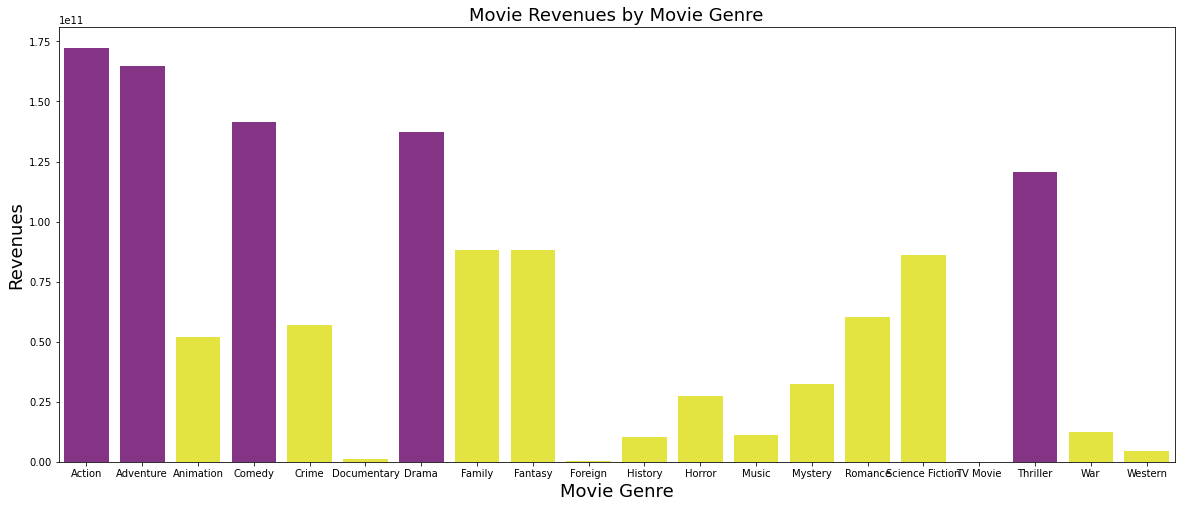

In [20]:
#plotting genresXrevenues
fig, ax = plt.subplots(figsize=(20,8))
plt.title('Movie Revenues by Movie Genre', fontsize=18);
plt.xlabel('Movie Genre', fontsize=18);
plt.ylabel('Revenues', fontsize=18);
sns.barplot(x=genres_list, y=genre_rev, palette=["purple" if x>= 1e11 else 'yellow' for x in genre_rev], ax=ax, alpha=.85);

> Seems that people like to pay to watch Action, Adventure, Comedy, and Drama the most!

> Now lets see which genres are most popular.

In [21]:
#creating list of popularity
genre_pop = [0]*len(genres_list)
         

for index, row in df.iterrows():
    for item in row['genres']:
        for i in range(len(genres_list)):
            if item == genres_list[i]:
                genre_pop[i] += row['popularity']

genre_pop

[2164.0985939999987,
 1646.280338999999,
 573.5973690000001,
 2193.473143999996,
 987.4084949999989,
 87.62409500000005,
 2740.629127000003,
 938.7350350000002,
 898.9391239999985,
 33.025848,
 177.84225600000022,
 745.2065209999989,
 185.9033599999999,
 541.7361639999993,
 985.2172440000003,
 1216.0444280000017,
 42.656701,
 2116.294089999997,
 181.06330600000007,
 82.58138099999998]

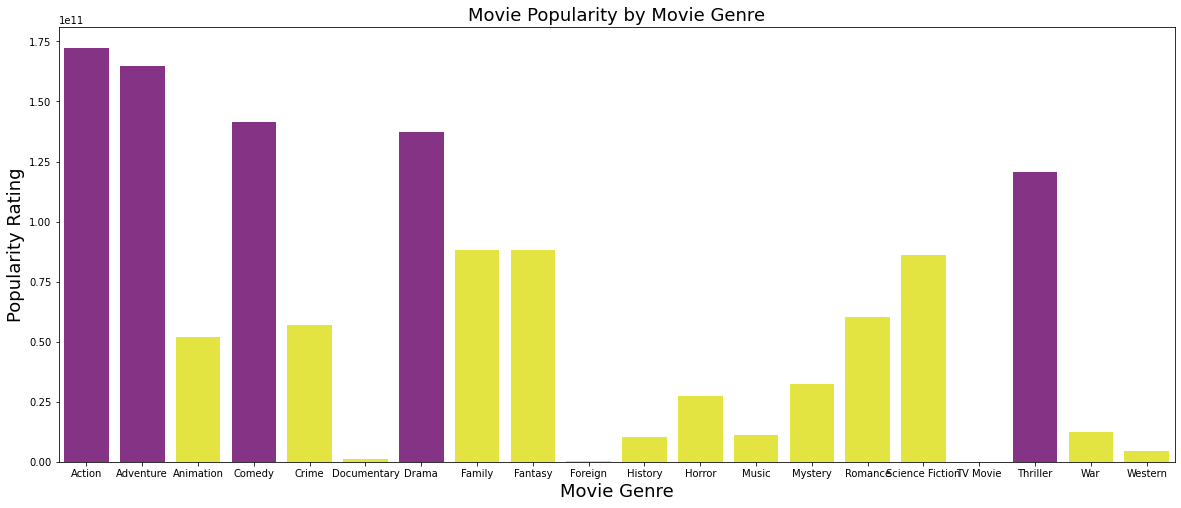

In [22]:
#plotting genresXpopularity
fig, ax = plt.subplots(figsize=(20,8))
plt.title('Movie Popularity by Movie Genre', fontsize=18);
plt.xlabel('Movie Genre', fontsize=18);
plt.ylabel('Popularity Rating', fontsize=18);
sns.barplot(x=genres_list, y=genre_rev, palette=["purple" if x>= 1e11 else 'yellow' for x in genre_rev], ax=ax, alpha=.85);

> Although it come 4th in terms of revnues, it seems that Drama is the most genre people like to watch. Followed by Action, Comedy, Thriller, and Adventure

> Lets check if that was the case all over the years

> First we will need to see people's familirtiy of movies in which years

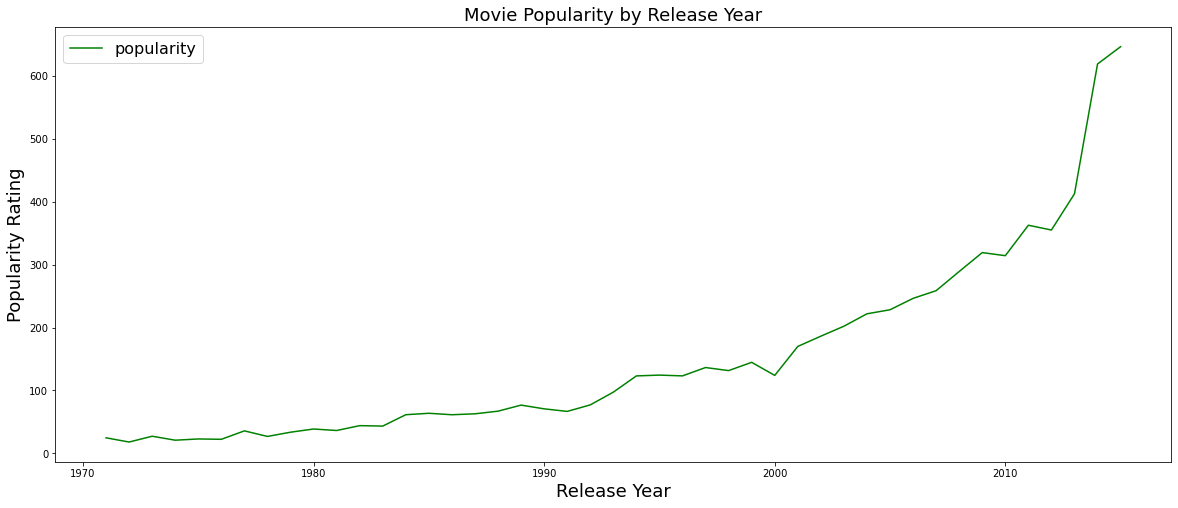

In [23]:
#plotting popularityXrelease year
popl = df.groupby('release_year')['popularity'].sum()
f, ax = plt.subplots(figsize=(20,8))
popl.plot(kind='line', color='Green');
plt.title('Movie Popularity by Release Year', fontsize=18)
plt.xlabel('Release Year', fontsize=18)
plt.ylabel('Popularity Rating', fontsize=18);
ax.legend(fontsize = 16);

> It seems that recent movies got more popularity. It would be interesting if we know if the prefered genres were the same over the years.

> That transfer us to the next to question.

### Research Question 2: Do people's preferable genres changed over time?

> Lets make new dataframes for the years 1995, 2005, 2015 and  to see how the prefered generes changed over time.

In [24]:
#creating dataframe for 1995
df_95 = df[['id', 'release_date', 'popularity', 'genres', 'release_year']].copy()
df_95 = df_95[(df_95['release_date'] >= '1995-01-01') & (df_95['release_date'] <= '1995-12-31')]
df_95

id release_date  popularity  \
8067    807   1995-09-22    4.765359   
8068    862   1995-10-30    4.282462   
8069    629   1995-07-19    3.440238   
8070    197   1995-05-24    2.533323   
8071    710   1995-11-16    2.440099   
...     ...          ...         ...   
8237  13552   1995-10-27    0.052554   
8238  40490   1995-03-03    0.082068   
8239  43612   1995-01-31    0.064672   
8240  32458   1995-10-28    0.013131   
8241  36278   1995-04-28    0.018196   

                                             genres  release_year  
8067                     [Crime, Mystery, Thriller]          1995  
8068                    [Animation, Comedy, Family]          1995  
8069                       [Drama, Crime, Thriller]          1995  
8070                  [Action, Drama, History, War]          1995  
8071                  [Adventure, Action, Thriller]          1995  
...                                             ...           ...  
8237                 [Action, Comedy, Crime, Drama]          1995  
8238                       [Action, Comedy, Family]          1995  
8239                                       [Comedy]          1995  
8240                 [Comedy, Documentary, Foreign]          1995  
8241  [Action, Adventure, Comedy, Family, Thriller]          1995  

[174 rows x 5 columns]

In [25]:
#this might take few moments
df_95_new = pd.DataFrame(columns=['id', 'release_date', 'popularity', 'genre', 'release_year'])
for index, row in df_95.iterrows():
    for item in row['genres']:
        df_95_new = df_95_new.append({'id': row['id'], 'release_date': row['release_date'], 'popularity':row['popularity'], 'genre': item, 'release_year': row['release_year']}, ignore_index=True, sort=False)

df_95_new

id release_date  popularity      genre release_year
0      807   1995-09-22    4.765359      Crime         1995
1      807   1995-09-22    4.765359    Mystery         1995
2      807   1995-09-22    4.765359   Thriller         1995
3      862   1995-10-30    4.282462  Animation         1995
4      862   1995-10-30    4.282462     Comedy         1995
..     ...          ...         ...        ...          ...
475  36278   1995-04-28    0.018196     Action         1995
476  36278   1995-04-28    0.018196  Adventure         1995
477  36278   1995-04-28    0.018196     Comedy         1995
478  36278   1995-04-28    0.018196     Family         1995
479  36278   1995-04-28    0.018196   Thriller         1995

[480 rows x 5 columns]

In [26]:
#creating dataframe for 2005
df_05 = df[['id', 'release_date', 'popularity', 'genres', 'release_year']].copy()
df_05 = df_05[(df_05['release_date'] >= '2005-01-01') & (df_05['release_date'] <= '2005-12-31')]
df_05

id release_date  popularity  \
6190    674   2005-11-05    5.939927   
6191    272   2005-06-14    5.400826   
6192    411   2005-12-07    3.628726   
6193    752   2005-12-11    3.617106   
6194    187   2005-03-31    3.520836   
...     ...          ...         ...   
6549  13222   2005-01-23    0.021811   
6550  18484   2005-09-12    0.021261   
6551  31329   2005-04-13    0.000973   
6552  13739   2005-01-01    0.006440   
6553  33081   2005-06-24    0.001983   

                                                 genres  release_year  
6190                       [Adventure, Fantasy, Family]          2005  
6191                             [Action, Crime, Drama]          2005  
6192                       [Adventure, Family, Fantasy]          2005  
6193                        [Action, Thriller, Fantasy]          2005  
6194                          [Action, Thriller, Crime]          2005  
...                                                 ...           ...  
6549                                      [Documentary]          2005  
6550                                            [Drama]          2005  
6551                                  [Comedy, Mystery]          2005  
6552                                           [Comedy]          2005  
6553  [Drama, Thriller, Science Fiction, Romance, Fo...          2005  

[361 rows x 5 columns]

In [27]:
#this might take few moments
df_05_new = pd.DataFrame(columns=['id', 'release_date', 'popularity', 'genre', 'release_year'])
for index, row in df_05.iterrows():
    for item in row['genres']:
        df_05_new = df_05_new.append({'id': row['id'], 'release_date': row['release_date'], 'popularity':row['popularity'], 'genre': item, 'release_year': row['release_year']}, ignore_index=True, sort=False)

df_05_new

id release_date  popularity            genre release_year
0      674   2005-11-05    5.939927        Adventure         2005
1      674   2005-11-05    5.939927          Fantasy         2005
2      674   2005-11-05    5.939927           Family         2005
3      272   2005-06-14    5.400826           Action         2005
4      272   2005-06-14    5.400826            Crime         2005
..     ...          ...         ...              ...          ...
926  33081   2005-06-24    0.001983            Drama         2005
927  33081   2005-06-24    0.001983         Thriller         2005
928  33081   2005-06-24    0.001983  Science Fiction         2005
929  33081   2005-06-24    0.001983          Romance         2005
930  33081   2005-06-24    0.001983          Foreign         2005

[931 rows x 5 columns]

In [28]:
#creating dataframe for 2015
df_15 = df[['id', 'release_date', 'popularity', 'genres', 'release_year']].copy()
df_15 = df_15[(df_15['release_date'] >= '2015-01-01') & (df_15['release_date'] <= '2015-12-31')]
df_15

id release_date  popularity  \
0    135397   2015-06-09   32.985763   
1     76341   2015-05-13   28.419936   
2    262500   2015-03-18   13.112507   
3    140607   2015-12-15   11.173104   
4    168259   2015-04-01    9.335014   
..      ...          ...         ...   
624  339928   2015-08-14    0.017625   
625  367735   2015-11-13    0.017050   
626  266764   2015-09-11    0.014647   
627  328346   2015-03-15    0.030371   
628  333346   2015-04-24    0.003920   

                                             genres  release_year  
0    [Action, Adventure, Science Fiction, Thriller]          2015  
1    [Action, Adventure, Science Fiction, Thriller]          2015  
2            [Adventure, Science Fiction, Thriller]          2015  
3     [Action, Adventure, Science Fiction, Fantasy]          2015  
4                         [Action, Crime, Thriller]          2015  
..                                              ...           ...  
624                         [Comedy, Drama, Family]          2015  
625                                        [Comedy]          2015  
626                                   [Documentary]          2015  
627                                   [Documentary]          2015  
628                                   [Documentary]          2015  

[617 rows x 5 columns]

In [29]:
#this might take few moments
df_15_new = pd.DataFrame(columns=['id', 'release_date', 'popularity', 'genre', 'release_year'])
for index, row in df_15.iterrows():
    for item in row['genres']:
        df_15_new = df_15_new.append({'id': row['id'], 'release_date': row['release_date'], 'popularity':row['popularity'], 'genre': item, 'release_year': row['release_year']}, ignore_index=True, sort=False)

df_15_new

id release_date  popularity            genre release_year
0     135397   2015-06-09   32.985763           Action         2015
1     135397   2015-06-09   32.985763        Adventure         2015
2     135397   2015-06-09   32.985763  Science Fiction         2015
3     135397   2015-06-09   32.985763         Thriller         2015
4      76341   2015-05-13   28.419936           Action         2015
...      ...          ...         ...              ...          ...
1367  339928   2015-08-14    0.017625           Family         2015
1368  367735   2015-11-13    0.017050           Comedy         2015
1369  266764   2015-09-11    0.014647      Documentary         2015
1370  328346   2015-03-15    0.030371      Documentary         2015
1371  333346   2015-04-24    0.003920      Documentary         2015

[1372 rows x 5 columns]

> Now that our dataframes are ready lets plot them to visualize the data.

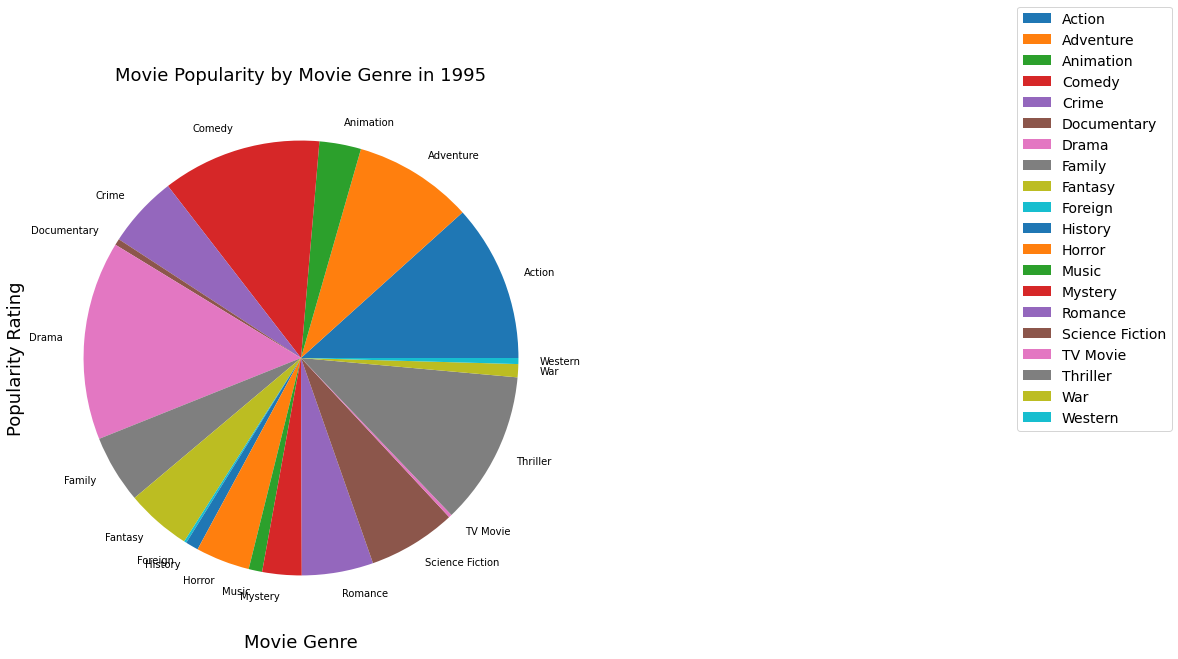

In [30]:
#plotting 1995 genres popularity
popl = df_95_new.groupby('genre')['popularity'].sum()
fig = plt.figure(figsize =(25, 10));
plt.pie(genre_pop, labels=genres_list);
plt.title('Movie Popularity by Movie Genre in 1995', fontsize=18)
plt.xlabel('Movie Genre', fontsize=18)
plt.ylabel('Popularity Rating', fontsize=18);
fig.legend(fontsize = 14);

> Seems that people in the 90's liked Drama a lot!

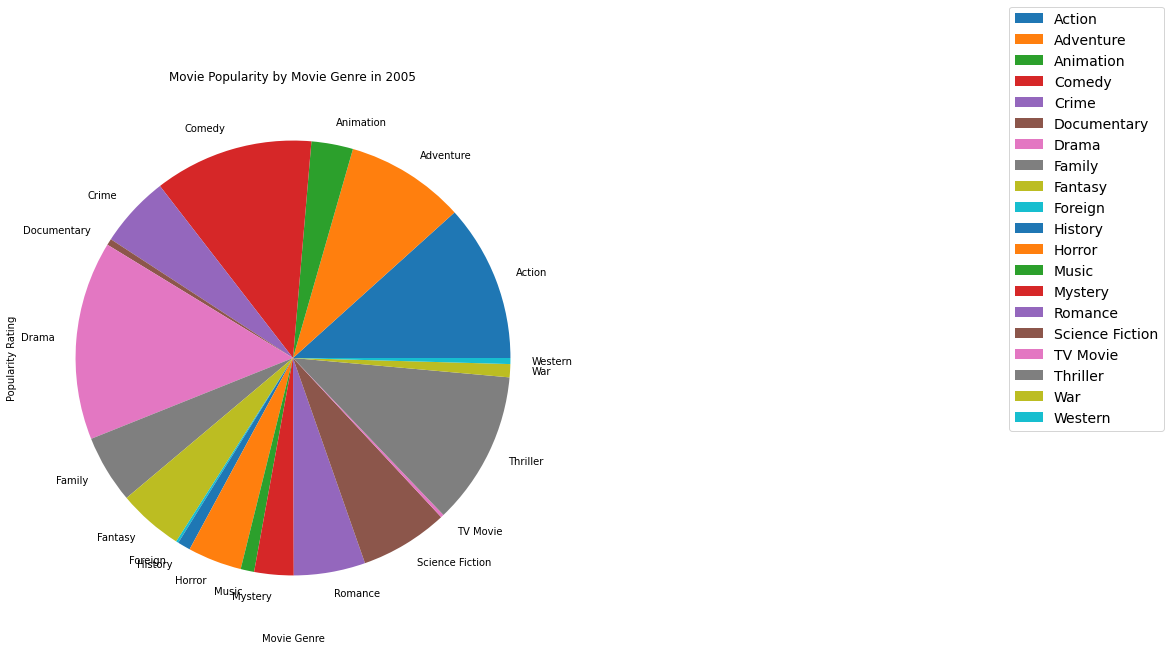

In [31]:
#plotting 2005 genres popularity
popl = df_05_new.groupby('genre')['popularity'].sum()
fig = plt.figure(figsize =(25, 10));
plt.pie(genre_pop, labels=genres_list);
plt.title('Movie Popularity by Movie Genre in 2005')
plt.xlabel('Movie Genre')
plt.ylabel('Popularity Rating');
fig.legend(fontsize = 14);

> Comedy movies were popluar in the early 2000's, probably there were better comedy at that time.

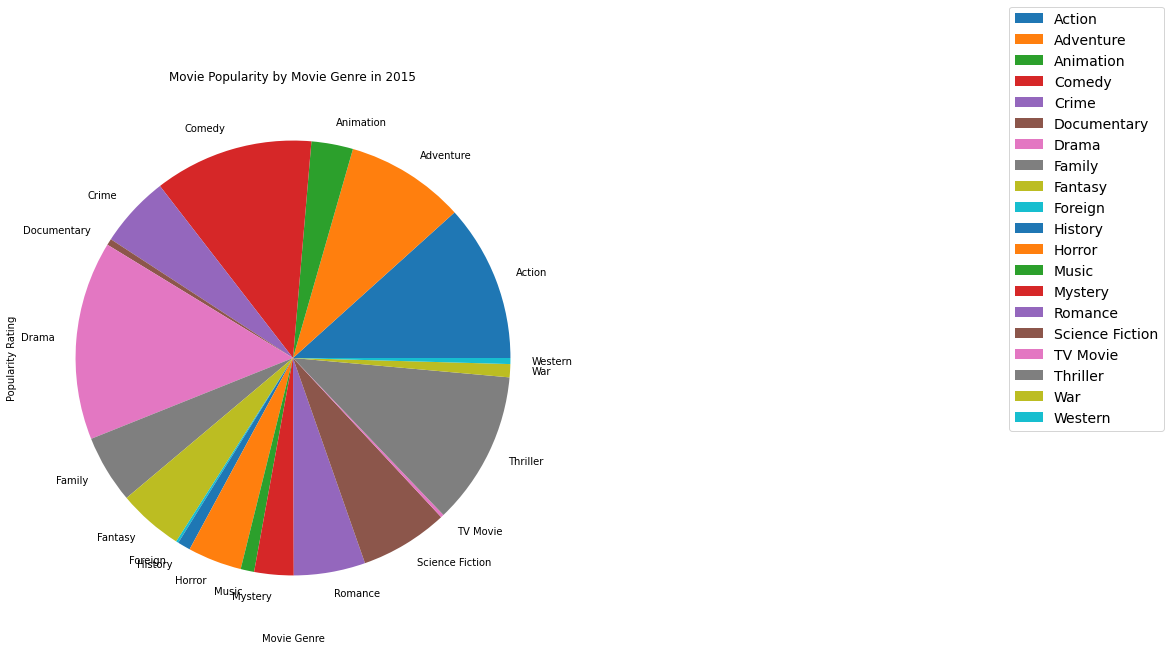

In [32]:
#plotting 2015 genres popularity
popl = df_15_new.groupby('genre')['popularity'].sum()
fig = plt.figure(figsize =(25, 10));
plt.pie(genre_pop, labels=genres_list);
plt.title('Movie Popularity by Movie Genre in 2015')
plt.xlabel('Movie Genre')
plt.ylabel('Popularity Rating');
fig.legend(fontsize = 14);

> Wow... Action, Adventure, Thriller, and Science Fiction really skyrocketed, most probably because the graphics are now better so its getting more popular

> What's interesting is that Drama was always popular through the years, we have a winner!

### Research Question 3 : Is spending higher budget return higher revenues?

> Finally lets investigate if spending higher budget movies get a higher revenue

In [33]:
#budgetXrevnue summary
df[['budget', 'revenue']].describe()

budget       revenue
count  1.033200e+04  1.033200e+04
mean   1.530998e+07  4.153092e+07
std    3.154000e+07  1.196189e+08
min    0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00
75%    1.700000e+07  2.652207e+07
max    4.250000e+08  2.781506e+09

> From the data above we can make levels for the budget and revenues "Low, Medium, High"

In [34]:
#new edges columns
bin_edges = [ -1, 1.530998e+07, 1.700000e+07, 4.250000e+08]
bin_names = [ 'low', 'medium', 'high']
df['budget_level'] = pd.cut(df['budget'], bin_edges, labels=bin_names)
df.head()

id  popularity     budget     revenue                original_title  \
0  135397   32.985763  150000000  1513528810                Jurassic World   
1   76341   28.419936  150000000   378436354            Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201                     Insurgent   
3  140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4  168259    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...   Colin Trevorrow   
1  [Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...     George Miller   
2  [Shailene Woodley, Theo James, Kate Winslet, A...  Robert Schwentke   
3  [Harrison Ford, Mark Hamill, Carrie Fisher, Ad...       J.J. Abrams   
4  [Vin Diesel, Paul Walker, Jason Statham, Miche...         James Wan   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                           genres release_date  vote_count  \
0  [Action, Adventure, Science Fiction, Thriller]   2015-06-09        5562   
1  [Action, Adventure, Science Fiction, Thriller]   2015-05-13        6185   
2          [Adventure, Science Fiction, Thriller]   2015-03-18        2480   
3   [Action, Adventure, Science Fiction, Fantasy]   2015-12-15        5292   
4                       [Action, Crime, Thriller]   2015-04-01        2947   

   vote_average  release_year    budget_adj   revenue_adj budget_level  
0           6.5          2015  1.379999e+08  1.392446e+09         high  
1           7.1          2015  1.379999e+08  3.481613e+08         high  
2           6.3          2015  1.012000e+08  2.716190e+08         high  
3           7.5          2015  1.839999e+08  1.902723e+09         high  
4           7.3          2015  1.747999e+08  1.385749e+09         high

In [35]:
#new edges columns
bin_edges = [ -1, 2.652207e+07, 4.153092e+07, 2.781506e+09]
bin_names = [ 'low', 'medium', 'high']
df['revenue_level'] = pd.cut(df['revenue'], bin_edges, labels=bin_names)
df.head()

id  popularity     budget     revenue                original_title  \
0  135397   32.985763  150000000  1513528810                Jurassic World   
1   76341   28.419936  150000000   378436354            Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201                     Insurgent   
3  140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4  168259    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...   Colin Trevorrow   
1  [Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...     George Miller   
2  [Shailene Woodley, Theo James, Kate Winslet, A...  Robert Schwentke   
3  [Harrison Ford, Mark Hamill, Carrie Fisher, Ad...       J.J. Abrams   
4  [Vin Diesel, Paul Walker, Jason Statham, Miche...         James Wan   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                           genres release_date  vote_count  \
0  [Action, Adventure, Science Fiction, Thriller]   2015-06-09        5562   
1  [Action, Adventure, Science Fiction, Thriller]   2015-05-13        6185   
2          [Adventure, Science Fiction, Thriller]   2015-03-18        2480   
3   [Action, Adventure, Science Fiction, Fantasy]   2015-12-15        5292   
4                       [Action, Crime, Thriller]   2015-04-01        2947   

   vote_average  release_year    budget_adj   revenue_adj budget_level  \
0           6.5          2015  1.379999e+08  1.392446e+09         high   
1           7.1          2015  1.379999e+08  3.481613e+08         high   
2           6.3          2015  1.012000e+08  2.716190e+08         high   
3           7.5          2015  1.839999e+08  1.902723e+09         high   
4           7.3          2015  1.747999e+08  1.385749e+09         high   

  revenue_level  
0          high  
1          high  
2          high  
3          high  
4          high

> We can see a summary for our comparison

In [36]:
#budget mean by level
df.groupby('budget_level').mean().budget

budget_level
low       1.960127e+06
medium    1.648609e+07
high      5.486705e+07
Name: budget, dtype: float64

In [37]:
#revenue mean by level
df.groupby('revenue_level').mean().revenue

revenue_level
low       2.390117e+06
medium    3.367281e+07
high      1.888764e+08
Name: revenue, dtype: float64

> Interesting, now lets visualize these

> We first need to create dataframes with each budget level to be able to plot them easily

In [38]:
#dataframe by low level budget
df_low = df[['id', 'budget', 'revenue', 'release_date', 'popularity', 'genres', 'release_year', 'budget_level', 'revenue_level']].copy()
df_low = df_low[df_low['budget_level'] == 'low']
df_low

id    budget   revenue release_date  popularity  \
12     264660  15000000  36869414   2015-01-21    6.118847   
30     280996         0  29355203   2015-06-19    3.927333   
35     264644   6000000  35401758   2015-10-16    3.557846   
36     339527         0  22354572   2015-09-03    3.358321   
39     167073  11000000  62076141   2015-11-04    3.227329   
...       ...       ...       ...          ...         ...   
10815   31657   3000000         0   1978-02-15    0.065504   
10816   16378         0         0   1978-03-22    0.064602   
10817   13963         0    321952   1978-05-01    0.064029   
10818   39995         0         0   1978-10-14    0.047645   
10819   16214         0  78000000   1978-07-28    0.044675   

                            genres  release_year budget_level revenue_level  
12        [Drama, Science Fiction]          2015          low        medium  
30                [Mystery, Drama]          2015          low        medium  
35               [Drama, Thriller]          2015          low        medium  
36         [Crime, Drama, Mystery]          2015          low           low  
39                [Drama, Romance]          2015          low          high  
...                            ...           ...          ...           ...  
10815        [Drama, Romance, War]          1978          low           low  
10816                     [Comedy]          1978          low           low  
10817         [Documentary, Music]          1978          low           low  
10818  [Horror, Thriller, Mystery]          1978          low           low  
10819             [Action, Comedy]          1978          low          high  

[7635 rows x 9 columns]

In [39]:
#dataframe by medium level budget
df_mid = df[['id', 'budget', 'revenue', 'release_date', 'popularity', 'genres', 'release_year', 'budget_level', 'revenue_level']].copy()
df_mid = df_mid[df_mid['budget_level'] == 'medium']
df_mid

id    budget    revenue release_date  popularity  \
82     333348  17000000   24000000   2015-11-12    2.055572   
670    193893  17000000  136621271   2014-08-13    3.149930   
682    218043  16000000   19682924   2014-10-03    2.601775   
719    255343  17000000          0   2014-10-11    1.655717   
794    264656  16000000    2429989   2014-05-18    0.870104   
...       ...       ...        ...          ...         ...   
9660    31650  17000000   10278549   1987-10-09    0.320540   
10028    9556  16000000   48878502   1990-08-24    0.429512   
10279    9272  17000000   44456478   1993-09-24    0.611772   
10473    8009  16000000    5900000   1986-03-07    1.528427   
10481   10068  17000000    6735922   1986-02-14    1.161139   

                                    genres  release_year budget_level  \
82                        [Family, Comedy]          2015       medium   
670                               [Comedy]          2014       medium   
682    [Thriller, Action, Science Fiction]          2014       medium   
719                    [Thriller, Romance]          2014       medium   
794                       [Western, Drama]          2014       medium   
...                                    ...           ...          ...   
9660     [Crime, Drama, Romance, Thriller]          1987       medium   
10028     [Action, Science Fiction, Crime]          1990       medium   
10279            [Drama, Horror, Thriller]          1993       medium   
10473         [Adventure, Action, Fantasy]          1986       medium   
10481                     [Drama, Romance]          1986       medium   

      revenue_level  
82              low  
670            high  
682             low  
719             low  
794             low  
...             ...  
9660            low  
10028          high  
10279          high  
10473           low  
10481           low  

[124 rows x 9 columns]

In [40]:
#dataframe by high level budget
df_high = df[['id', 'budget', 'revenue', 'release_date', 'popularity', 'genres', 'release_year', 'budget_level', 'revenue_level']].copy()
df_high = df_high[df_high['budget_level'] == 'high']
df_high

id     budget     revenue release_date  popularity  \
0      135397  150000000  1513528810   2015-06-09   32.985763   
1       76341  150000000   378436354   2015-05-13   28.419936   
2      262500  110000000   295238201   2015-03-18   13.112507   
3      140607  200000000  2068178225   2015-12-15   11.173104   
4      168259  190000000  1506249360   2015-04-01    9.335014   
...       ...        ...         ...          ...         ...   
10556   30194   18000000     3900000   1986-06-13    0.277984   
10584   13766   18000000     9697739   1986-06-06    0.094098   
10756     579   20000000   187884007   1978-06-16    1.562700   
10758    1924   55000000   300218018   1978-12-14    1.210324   
10788   24961   24000000    21049053   1978-10-24    0.277769   

                                                  genres  release_year  \
0         [Action, Adventure, Science Fiction, Thriller]          2015   
1         [Action, Adventure, Science Fiction, Thriller]          2015   
2                 [Adventure, Science Fiction, Thriller]          2015   
3          [Action, Adventure, Science Fiction, Fantasy]          2015   
4                              [Action, Crime, Thriller]          2015   
...                                                  ...           ...   
10556                        [Science Fiction, Thriller]          1986   
10584                                [Family, Adventure]          1986   
10756                                 [Horror, Thriller]          1978   
10758      [Adventure, Fantasy, Action, Science Fiction]          1978   
10788  [Adventure, Family, Fantasy, Music, Science Fi...          1978   

      budget_level revenue_level  
0             high          high  
1             high          high  
2             high          high  
3             high          high  
4             high          high  
...            ...           ...  
10556         high           low  
10584         high           low  
10756         high          high  
10758         high          high  
10788         high           low  

[2573 rows x 9 columns]

> Now that our data is ready lets start plotting it

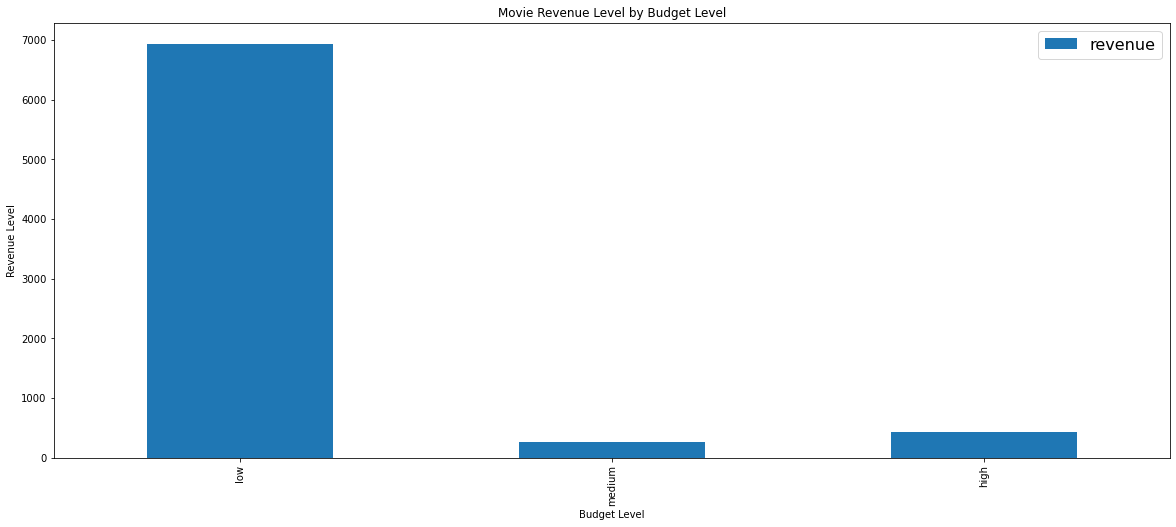

In [41]:
#plotting low level budget revenues
f, ax = plt.subplots(figsize=(20,8))
df_low.groupby('revenue_level').count().revenue.plot(kind='bar');
plt.title('Movie Revenue Level by Budget Level')
plt.xlabel('Budget Level')
plt.ylabel('Revenue Level');
ax.legend(fontsize = 16);

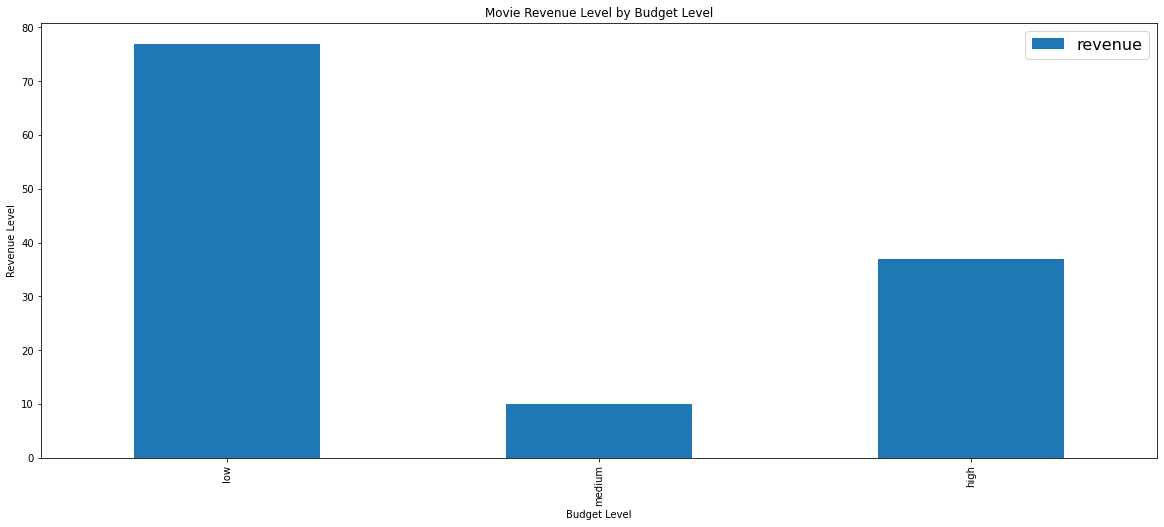

In [42]:
#plotting medium level budget revenues
f, ax = plt.subplots(figsize=(20,8))
df_mid.groupby('revenue_level').count().revenue.plot(kind='bar');
plt.title('Movie Revenue Level by Budget Level')
plt.xlabel('Budget Level')
plt.ylabel('Revenue Level');
ax.legend(fontsize = 16);

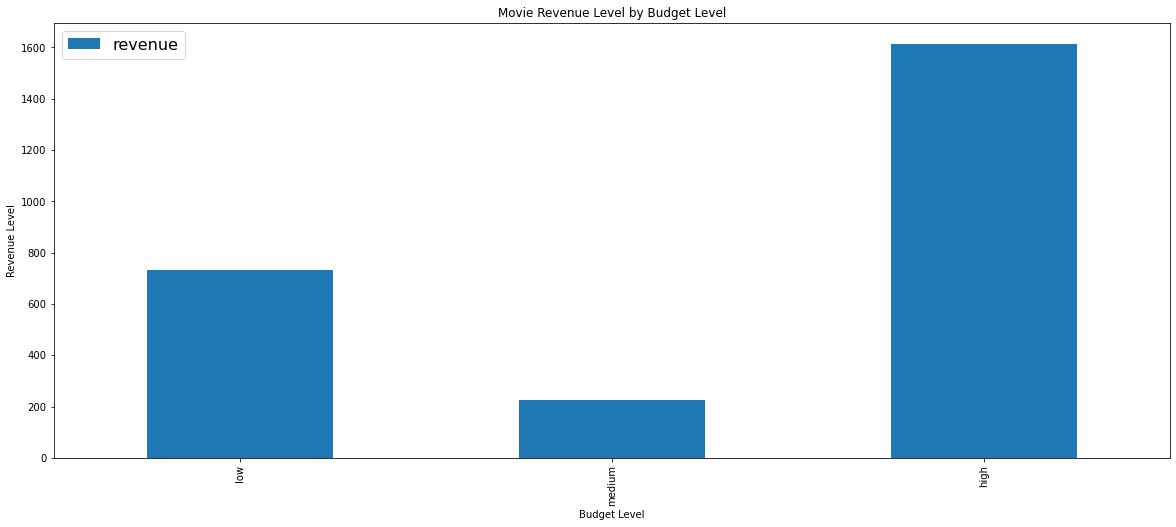

In [43]:
#plotting high level budget revenues
f, ax = plt.subplots(figsize=(20,8))
df_high.groupby('revenue_level').count().revenue.plot(kind='bar');
plt.title('Movie Revenue Level by Budget Level')
plt.xlabel('Budget Level')
plt.ylabel('Revenue Level');
ax.legend(fontsize = 16);

<a id='conclusions'></a>
## Conclusions

> We can summarize our findings and the results that have been performed in the following:

> **The most prefered genres are: Action, Adventure, Comedy, Drama, Thriller**
    
> **Although Action and Adventure movies made higher revenues, Drama is more popular**
    
> **The popularity of the movies significantly rises with more recent release years**

> **Drama genre is always popular. Action, Adventure, Thriller, and Science-Fiction movies became very popular in recent year probably because of the modern CGI development**


> **Movies with higher budget tend to bring high revenues**

> **Challenges:** Main challenge was plotting the data for some reasons, first one is that some data needed to be sliced into lists and that was pretty hard. Secondly, using the functions for plotting needed some research, specially when it comes to coloring the data with conditions. But it was all applicable in the end.

# Thank You